Choose any:
1.Input from user
2.Fetch random student from dataset

2
Here is the information about Ngathem Johnson Singh

The student's performance is rated as 6.04 out of 10.



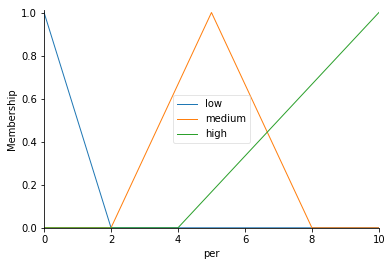

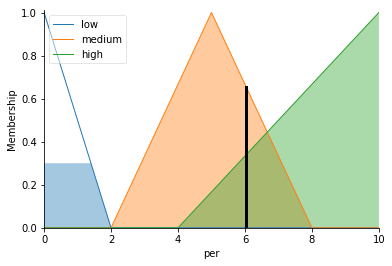

In [4]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import numpy as np
import skfuzzy as fuzz
import pandas as pd
from skfuzzy import control as ctrl
import random

def cal_performance(vector):

    ev=ctrl.Antecedent(np.arange(0,41,1),'ev')
    ca=ctrl.Antecedent(np.arange(0,101,1),'ca')
    att=ctrl.Antecedent(np.arange(0,101,1),'att')
    wh=ctrl.Antecedent(np.arange(0,11,1),'wh')
    per=ctrl.Consequent(np.arange(0,11,1),'per')

    ev.automf(3)
    ca.automf(3)
    att.automf(3)
    wh.automf(3)

    per['low']=fuzz.trimf(per.universe,[0,0,2])
    per['medium']=fuzz.trimf(per.universe,[2,5,8])
    per['high']=fuzz.trimf(per.universe,[4,10,10])

    per.view()
    rule1=ctrl.Rule(ev['poor']|ca['poor']|att['poor']|wh['poor'],per['low'])
    rule2=ctrl.Rule(ev['average']|ca['average']|att['average']|wh['average'],per['medium'])
    rule3=ctrl.Rule(ev['good']|ca['good']|att['good']|wh['good'],per['high'])

    per_ctrl=ctrl.ControlSystem([rule1,rule2,rule3])
    performance=ctrl.ControlSystemSimulation(per_ctrl)

    performance.input['ev']=vector[0]
    performance.input['ca']=vector[1]
    performance.input['att']=vector[2]
    performance.input['wh']=vector[3]

    performance.compute()
    print("\nThe student's performance is rated as", round(performance.output['per'],2), "out of 10.\n")
    per.view(sim=performance)

# Input from the user
def input_user():
    print("Enter the name of the student:\n")
    name = input()
    print("Enter the values of 4 Evaluations, CA, Attendance and weekly hours to calculate performance of the student\n")
    values = list()
    for i in range(7):
        if(i==5):
            print("Enter the Attendance out of 100:")
        elif (i==4):
            print("Enter the marks of CA out of 100:")
        elif (i==6):
            print("Enter the weekly hours of Student:")
        else:
            print("Enter marks of Eval", i+1, " out of 40:", sep="")
        n = int(input())
        values.append(n)

    # Inference from input
    mini = min(values[:4])
    values.remove(mini)
    vector = [sum(values[:3])*(0.6667), values[3], values[4], values[5]]
    print("The performance of the student", name)
    cal_performance(vector)
    
def fetch_db():
    index = random.randint(2, 43)
    df = pd.read_csv("student_data_ca.csv")
    vector = [df.iloc[index][3], df.iloc[index][4], df.iloc[index][9], df.iloc[index][10]]
    print("Here is the information about", df.iloc[index][0])
    cal_performance(vector)
    
# Driver Code
print("Choose any:\n1.Input from user\n2.Fetch random student from dataset\n")
choice = int(input())
if(choice==1):
    input_user()
elif (choice==2):
    fetch_db()
else:
    print("Invalid option!")
